# Работа со строками и немного про графики

## Полезные ссылки

## Импорты и настройки

In [2]:
!pip install nltk

     |████████████████████████████████| 1.4 MB 987 kB/s eta 0:00:01
     |████████████████████████████████| 719 kB 26.4 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=252d40c796e3637ab39cb59ff630c636e9a528f96de1a19351f5a5ca3dec2f23
  Stored in directory: /home/bubulmet/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [4]:
import pandas as pd
import numpy as np

import requests
import json

import string
import re
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# украшаем графики
plt.rcParams["figure.figsize"] = (17,8) # размер
plt.style.use('ggplot')                 # модный стиль

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/bubulmet/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bubulmet/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Возьмем датку

датка [отсюда](https://hubofdata.ru/), вот [эта](https://opengovdata.ru/dataset/mos-nko-2013)

In [7]:
url = 'https://hubofdata.ru/storage/f/2013-10-24T12%3A55%3A39.754Z/religion-orgs.json'

response = requests.get(url)

response.status_code

200

In [8]:
response.text[:100]

'{\r\n  "rows" : [\r\n    {\r\n      "registry" : "Религиозные организации",\r\n      "regnumber" : "77110101'

In [9]:
data_json = json.loads(response.text)

type(data_json)

dict

In [10]:
data_json.keys()

dict_keys(['rows'])

In [11]:
type(data_json['rows'])

list

In [12]:
data_json['rows'][0]

{'registry': 'Религиозные организации',
 'regnumber': '7711010133',
 'name': 'Местная религиозная организация Московское общество сознания Кришны',
 'ogrn': '1037700213869',
 'ogrn_date': '14.02.2003',
 'address': '125284,\xa0Москва,\xa0ул.\xa0Беговая,\xa0д.13',
 'orgform': 'Религиозная организация',
 'region': 'Москва',
 'status': 'Зарегистрирована'}

In [13]:
df = pd.DataFrame().from_records(data_json['rows'])

df.head()

,registry,regnumber,name,ogrn,ogrn_date,address,orgform,region,status
0,Религиозные организации,7711010133,Местная религиозная организация Московское общ...,1037700213869,14.02.2003,"125284, Москва, ул. Беговая, д.13",Религиозная организация,Москва,Зарегистрирована
1,Религиозные организации,7711010048,Ахмадийская мусульманская община г.Москвы,None,None,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...",Религиозная организация,Москва,Зарегистрирована
2,Религиозные организации,7711010655,Буддийский центр Падма Самбава,None,None,None,Религиозная организация,Москва,Зарегистрирована
3,Религиозные организации,7711010425,"Иудейская религиозная организация ""Московская ...",None,None,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...",Религиозная организация,Москва,Зарегистрирована
4,Религиозные организации,7711010030,Корейская пресветерианская Церковь,None,None,"Ст. Супруна, 12 - 3 - 38",Религиозная организация,Москва,Зарегистрирована


In [42]:
df['address'][0]

'125284,\xa0Москва,\xa0ул.\xa0Беговая,\xa0д.13'

In [14]:
df.shape

(734, 9)

In [35]:
# # на случай недоступности сайта
# df.to_pickle('data.pkl')

In [3]:
# df = pd.read_pickle('data.pkl')

## Работа со строками

### разбираем адрес на составляющие

In [38]:
df['address'].head(20)

0                     125284, Москва, ул. Беговая, д.13
1     г.Москва, ул. Госпитальный вал, д.5, корп.18, ...
2                                                  None
3     101000, Москва, Б.Спасоглинищевский пер, д.9/1...
4                              Ст. Супруна, 12 - 3 - 38
5      Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46
6          109428, Москва, ул. Михайлова, д. 13, кв. 40
7     111672, Москва, ул. Новокосинская, д. 14, корп...
8      129345, Москва, ул. Осташковская, д. 21, кв. 104
9       109388, Москва, ул. Шоссейная, д. 26/10, кв. 27
10    123308, Москва, Карамышевская наб., д. 32/2, к...
11    115184, Москва, Малый Татарский переулок, д. 5...
12    115582 Москва, Каширское ш., д.110, корп.2, кв...
13    101000, Москва, Б. Спасоглинищеский пер., д.10...
14    101000, Москва, Б.Спасоглинищевский пер., 10, ...
15         129282, г. Москва, ул. Широкая, д. 7, кор. 6
16           119146, Москва, ул. 1-я Фрунзенская, д. 5.
17    115516, Москва, ул.Прохладная, д.18, стр.1

Задача непростая: форматы в каждой строке свои, есть пропуски. Но тем интереснее!

#### индекс

Индекс - это шесть цифр. И больше ничего похожего в адресе быть не должно. Так что тут достаточно регулярки.

In [39]:
df['index'] = df['address'].str.extract(r'(\d{6})') # скобки вокруг паттерна!

df[['address', 'index']].head(10)

,address,index
0,"125284, Москва, ул. Беговая, д.13",125284
1,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...",NaN
2,None,NaN
3,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...",101000
4,"Ст. Супруна, 12 - 3 - 38",NaN
5,"Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46",NaN
6,"109428, Москва, ул. Михайлова, д. 13, кв. 40",109428
7,"111672, Москва, ул. Новокосинская, д. 14, корп...",111672
8,"129345, Москва, ул. Осташковская, д. 21, кв. 104",129345
9,"109388, Москва, ул. Шоссейная, д. 26/10, кв. 27",109388


In [40]:
# проверим степень заполнения
print(f"Осталось незаполнено в {((df['index'].isnull().sum() / df.shape[0]) * 100):.2f}% строк")

Осталось незаполнено в 6.95% строк


In [41]:
# проверим, что незаполнено по объективным причинам
df['address'].loc[df['index'].isnull()].head(10)

1     г.Москва, ул. Госпитальный вал, д.5, корп.18, ...
2                                                  None
4                              Ст. Супруна, 12 - 3 - 38
5      Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46
35         г. Москва, Волгоградский пр-кт, д. 17, кв. 8
48                                                 None
50                                                 None
73                 г.Москва, ул.Покровка, д.20/1, кв.36
74                           ул.Покровка, д.20/1, кв.36
82               г.Москва, Новоясеневский пр-т, д.25/20
Name: address, dtype: object

#### ищем спец. слова

затем разбиваем строку на слова

In [45]:
' something'.split(' ')

['', 'something']

In [49]:
'    something     '.strip()

'something'

In [46]:
def tokenize_me(text):
    if pd.isnull(text): # это на случай незаполненных адресов
        return []
    else:
        # чтобы избежать проблем с регистром, приведём его к единому
        text = text.lower()
        
        # я эту ошибку потом заметил, но проще её тут решить
        text = text.replace('\xa0', ' ')
        
        # разбиваем по запятой
        tokens_list = text.split(',')
        
        # разбиваем по пробелу
        list_of_tokens_list = [token.split(' ') for token in tokens_list]
        tokens_list = sum(list_of_tokens_list, []) # превращаем список списков в одноуровневый список
        
        # разбиваем по точке
        list_of_tokens_list = [token.split('.') for token in tokens_list]
        tokens_list = sum(list_of_tokens_list, []) 
        
        # очищаем результат
        tokens_list = [token.strip() for token in tokens_list]

        # удаляем пустые строки
        tokens_list = [token for token in tokens_list if (token != '')]
        
        return tokens_list

In [47]:
tokenize_me(df['address'][3])

['101000',
 'москва',
 'б',
 'спасоглинищевский',
 'пер',
 'д',
 '9/1',
 'стр',
 '7',
 '743-05-51']

In [48]:
df['words'] = df['address'].apply(tokenize_me)

df[['address', 'words']].head()

,address,words
0,"125284, Москва, ул. Беговая, д.13","[125284, москва, ул, беговая, д, 13]"
1,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...","[г, москва, ул, госпитальный, вал, д, 5, корп,..."
2,None,[]
3,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...","[101000, москва, б, спасоглинищевский, пер, д,..."
4,"Ст. Супруна, 12 - 3 - 38","[ст, супруна, 12, -, 3, -, 38]"


Отлично, теперь все слова собираем в одну серию

In [50]:
[1,2] + [3,4,5]

[1, 2, 3, 4, 5]

In [51]:
words_series = pd.Series(df['words'].sum())

words_series.head()

0     125284
1     москва
2         ул
3    беговая
4          д
dtype: object

Уберем числа:

In [52]:
words_series = words_series.loc[- words_series.str.fullmatch(r'\d+')]

words_series.head()

1     москва
2         ул
3    беговая
4          д
6          г
dtype: object

In [53]:
words_series.shape

(4152,)

и смотрим частоту. Вспомогательные слова должны быть наиболее частотными

In [54]:
words_series.value_counts()[:40]

москва               712
д                    632
ул                   417
кв                   191
г                    176
стр                  149
корп                 120
пер                   94
дом                   56
шоссе                 41
б                     33
кор                   32
проспект              22
прохладная            22
проезд                19
к                     18
вал                   18
т                     17
наметкина             16
пр-д                  15
варшавское            15
чистый                14
преображенский        12
бульвар               12
малый                 11
большая               11
а                     11
пр-т                  11
2-й                   10
переулок              10
вернадского           10
пр                     9
наб                    9
ш                      9
новоясеневский         9
покровка               8
спасоглинищевский      8
новые                  8
измайловский           8
-                      8


Эти спец. слова помогут нам вытянуть другие части адреса

#### улицы

соберем указатели улиц:

In [56]:
street_words = [
    'ул', 'пер', 'шоссе', 'проспект', 'проезд', 'пр-д', 'бульвар', 'пр-т', 'переулок', 'ш', 'пр', 'наб'
]

и попытаемся с их помощью вытянуть улицы

In [66]:
pattern = f"((,|^)[^,]*({'|'.join(street_words)})[^,]*,)"

pattern

'((,|^)[^,]*(ул|пер|шоссе|проспект|проезд|пр-д|бульвар|пр-т|переулок|ш|пр|наб)[^,]*,)'

In [67]:
print('a\tb')

a	b


In [68]:
print(r'a\tb')

a\tb


In [69]:
street_regexp_pattern = re.compile(pattern, flags=re.I) # re.I - команда игнорировать регистр (ignorecase flag)

In [70]:
df['street'] = df['address'].str.extract(street_regexp_pattern)[0]

df[['address', 'street']].head(10)

,address,street
0,"125284, Москва, ул. Беговая, д.13",", ул. Беговая,"
1,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...",", ул. Госпитальный вал,"
2,None,NaN
3,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...",", Б.Спасоглинищевский пер,"
4,"Ст. Супруна, 12 - 3 - 38","Ст. Супруна,"
5,"Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46",", ул.Дмитрия Ульянова,"
6,"109428, Москва, ул. Михайлова, д. 13, кв. 40",", ул. Михайлова,"
7,"111672, Москва, ул. Новокосинская, д. 14, корп...",", ул. Новокосинская,"
8,"129345, Москва, ул. Осташковская, д. 21, кв. 104",", ул. Осташковская,"
9,"109388, Москва, ул. Шоссейная, д. 26/10, кв. 27",", ул. Шоссейная,"


немного почистим

In [72]:
df['street'] = df['street'].str.replace(',', '').str.strip()

df[['address', 'street']].head(10)

,address,street
0,"125284, Москва, ул. Беговая, д.13",ул. Беговая
1,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...",ул. Госпитальный вал
2,None,NaN
3,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...",Б.Спасоглинищевский пер
4,"Ст. Супруна, 12 - 3 - 38",Ст. Супруна
5,"Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46",ул.Дмитрия Ульянова
6,"109428, Москва, ул. Михайлова, д. 13, кв. 40",ул. Михайлова
7,"111672, Москва, ул. Новокосинская, д. 14, корп...",ул. Новокосинская
8,"129345, Москва, ул. Осташковская, д. 21, кв. 104",ул. Осташковская
9,"109388, Москва, ул. Шоссейная, д. 26/10, кв. 27",ул. Шоссейная


In [73]:
# проверим степень заполнения
print(f"Осталось незаполнено в {((df['street'].isnull().sum() / df.shape[0]) * 100):.2f}% строк")

Осталось незаполнено в 24.25% строк


In [74]:
# проверим, что незаполнено по объективным причинам
df['address'].loc[df['street'].isnull()].head(10)

2                                                  None
24       117437 Москва, ул.Академика Волгина д.25 кор.1
31    101000 Москва, Старосадский пер. д.7/10  924-5...
33    103617, г. Москва, г. Зеленоград, кор. 1449, к...
39    117449 Москва, ул.Дм.Ульянова д.25а корп. 1 12...
48                                                 None
50                                                 None
51                107066, Москва,Спартаковская ул. д.15
57                     101000 Москва,пер.Никитников д.3
60                       119034 Москва, Чистый пер. д.5
Name: address, dtype: object

Есть проблемы со случаями, когда нет запятой после улицы. И когда улица без указания типа (просто `Ст. Супруна`). Но уже неплохо :)

#### дом

тут попробуем следующую хитрость: берем первую цифру после улицы

In [77]:
def house_finder(row_string):
    adress = row_string['address']
    street = row_string['street']
    
    if pd.isnull(street):# защитимся от проблем с незаполненными адресами
        return np.nan
    else:
        after_street = adress.split(street)[1]
        return re.search(r'\d+', after_street)[0]

In [75]:
df.loc[0]

registry                               Религиозные организации
regnumber                                           7711010133
name         Местная религиозная организация Московское общ...
ogrn                                             1037700213869
ogrn_date                                           14.02.2003
address                      125284, Москва, ул. Беговая, д.13
orgform                                Религиозная организация
region                                                  Москва
status                                        Зарегистрирована
index                                                   125284
words                     [125284, москва, ул, беговая, д, 13]
street                                             ул. Беговая
Name: 0, dtype: object

In [78]:
house_finder(df.loc[0])

'13'

In [79]:
df['house'] = df.apply(house_finder, axis=1)

df[['address', 'house']].head(10)

,address,house
0,"125284, Москва, ул. Беговая, д.13",13
1,"г.Москва, ул. Госпитальный вал, д.5, корп.18, ...",5
2,None,NaN
3,"101000, Москва, Б.Спасоглинищевский пер, д.9/1...",9
4,"Ст. Супруна, 12 - 3 - 38",12
5,"Москва, ул.Дмитрия Ульянова, д.17, корп.3 кв. 46",17
6,"109428, Москва, ул. Михайлова, д. 13, кв. 40",13
7,"111672, Москва, ул. Новокосинская, д. 14, корп...",14
8,"129345, Москва, ул. Осташковская, д. 21, кв. 104",21
9,"109388, Москва, ул. Шоссейная, д. 26/10, кв. 27",26


In [80]:
# проверим степень заполнения
print(f"Осталось незаполнено в {((df['house'].isnull().sum() / df.shape[0]) * 100):.2f}% строк")

Осталось незаполнено в 24.25% строк


Столько же проблем, сколько и с улицами. Проверим этот момент.

In [81]:
# проверим, что незаполнено по объективным причинам
df[['address', 'street']].loc[df['house'].isnull()].head(10)

,address,street
2,None,NaN
24,"117437 Москва, ул.Академика Волгина д.25 кор.1",NaN
31,"101000 Москва, Старосадский пер. д.7/10 924-5...",NaN
33,"103617, г. Москва, г. Зеленоград, кор. 1449, к...",NaN
39,"117449 Москва, ул.Дм.Ульянова д.25а корп. 1 12...",NaN
48,None,NaN
50,None,NaN
51,"107066, Москва,Спартаковская ул. д.15",NaN
57,"101000 Москва,пер.Никитников д.3",NaN
60,"119034 Москва, Чистый пер. д.5",NaN


Ну и так далее...

### Ищем похожие строки

Теперь поразбираемся с организациями. Это к вопросу о поиске заведений из одной сети.

In [136]:
df['name'].head(10)

0    Местная религиозная организация Московское общ...
1            Ахмадийская мусульманская община г.Москвы
2                       Буддийский центр Падма Самбава
3    Иудейская религиозная организация "Московская ...
4                   Корейская пресветерианская Церковь
5    Местная  религиозная организация Церковь Христ...
6    Местная буддистская религиозная организация "О...
7    Местная исламская религиозная организация  "Да...
8    Местная исламская религиозная организация  Сев...
9    Местная исламская религиозная организация горо...
Name: name, dtype: object

#### множества букв

In [91]:
def letter_set_closeness(text_a, text_b):
    # берем множество букв, единый регистр сразу же
    a_letter_set = set(text_a.lower()) 
    b_letter_set = set(text_b.lower()) 
    
    # очищаем от пунктуации
    a_letter_set = a_letter_set - set(string.punctuation)
    b_letter_set = b_letter_set - set(string.punctuation)
    
    # очищаем от пробелов
    a_letter_set = a_letter_set - set(string.whitespace)
    b_letter_set = b_letter_set - set(string.whitespace)
    
    intersection = a_letter_set & b_letter_set
    
    return len(intersection) / len(b_letter_set)

In [92]:
letter_set_closeness('Местная буддистская религиозная организация', 'Местная исламская религиозная организация')

1.0

In [93]:
letter_set_closeness('Местная буддистская религиозная организация', 'Буддийский центр Падма Самбава')

0.8125

In [94]:
# обеспечиваем поведение "чем больше - тем менее похоже"
def letter_set_distance(text_a, text_b):
    return 1 - letter_set_closeness(text_a, text_b)

#### Расстояние Левенштейна

реализация подсмотрена [тут](https://ru.wikibooks.org/wiki/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0#Python) (чтоб целый пакет ради этого не качать)

In [95]:
def levenshtein_distance(a, b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n, m)) space
        a, b = b, a
        n, m = m, n

    current_row = range(n + 1)  # Keep current and previous row, not entire matrix
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if a[j - 1] != b[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [96]:
levenshtein_distance('Местная буддистская религиозная организация', 'Местная исламская религиозная организация')

7

In [97]:
levenshtein_distance('Местная буддистская религиозная организация', 'Буддийский центр Падма Самбава')

32

#### поиск групп

In [89]:
def group_finder(names_series, distance_function, distance_threshold):
    result_df = pd.DataFrame({'name': names_series})
    result_df['name_len'] = result_df['name'].str.len()
    result_df['group_center'] = np.nan
    result_df['distance'] = np.nan
    result_df['group'] = np.nan
    
    group_counter = 1
    
    while len(result_df.loc[result_df['group'].isnull()]) > 1: # если == 1 - это группа из одного имени осталась
        group_center = result_df.loc[result_df['group'].isnull()] \
            .sort_values('name_len', ascending=True) \
            ['name'].iat[0]
        
        result_df.loc[result_df['group'].isnull(), 'distance'] = \
            result_df.loc[result_df['group'].isnull(), 'name'].apply(lambda x: distance_function(x, group_center))
        
        result_df.loc[
            result_df['group'].isnull() & (result_df['distance'] < distance_threshold), 
            'group_center'
        ] = group_center
        
        result_df.loc[
            result_df['group'].isnull() & (result_df['distance'] < distance_threshold), 
            'group'
        ] = group_counter
        
        group_counter += 1
    
    # если len(ungrupped_names_set) == 1
    result_df['group'] = result_df['group'].fillna(group_counter) 
    result_df['group_center'] = result_df['group_center'].fillna(group_counter) 
    
    result_df['group'] = result_df['group'].astype(int)
    
    return result_df

In [98]:
res = group_finder(df['name'], letter_set_distance, 0.1)

res['group'].value_counts().sort_index()

1     351
2     113
3     120
4      30
5      43
6       5
7       1
8       1
9       1
10     43
11      1
12     11
13      8
14      1
15      1
16      2
17      1
18      1
Name: group, dtype: int64

In [99]:
res.loc[res['group'] == 6]

,name,name_len,group_center,distance,group
91,Местная религиозная организация - Церковь еван...,75,Молодежная миссия христиан-евангелистов,0.0625,6
133,Местная религиозная организация Евангельских х...,87,Молодежная миссия христиан-евангелистов,0.0625,6
494,Местная религиозная организация христиан Христ...,97,Молодежная миссия христиан-евангелистов,0.0625,6
508,Местная религиозная организация Церковь Адвент...,89,Молодежная миссия христиан-евангелистов,0.0625,6
569,Молодежная миссия христиан-евангелистов,39,Молодежная миссия христиан-евангелистов,0.0000,6


In [210]:
res.loc[res['group'] == 6]['name'].values

array(['Местная религиозная организация - Церковь евангельских христиан "Река Жизни',
       'Местная религиозная организация Евангельских христиан "Христианская миссия "Новая жизнь',
       'Местная религиозная организация христиан Христианская миссия "Евангелическое Лютеранское Служение',
       'Местная религиозная организация Церковь Адвентистов Седьмого Дня Реформационного Движения',
       'Молодежная миссия христиан-евангелистов'], dtype=object)

In [100]:
res = group_finder(df['name'], levenshtein_distance, 100)

res['group'].value_counts().sort_index()

1    454
2     64
3    159
4      2
5     52
6      1
7      1
8      1
Name: group, dtype: int64

In [216]:
res.loc[res['group'] == 4]['name'].values

array(['Религиозная организация - Православная религиозная община Великомученника и Целителя Пантелеймона Украинской православной церкви Киевского Патриархата',
       'Религиозная организация Первая Московская Христианская Миссионерская Церковь Полного Евангелия Христианского миссионерского центра "Вселенная - Иисусу'],
      dtype=object)

#### а если выбросить частотные слова?

In [101]:
tokenized_names = df['name'].str.lower().apply(nltk.word_tokenize, language="russian")

tokens = pd.Series(tokenized_names.sum())

tokens.value_counts().head(30)

религиозная     715
организация     661
местная         564
``              504
церкви          295
приход          258
православной    256
московской      253
русской         249
епархии         248
храма           244
)               243
(               243
москвы          240
православный    233
церковь         214
московский      201
в               199
христиан        196
гор.            192
патриархат      191
евангельских    117
-                98
веры             91
община           91
московская       90
евангельской     84
''               75
на               75
,                60
dtype: int64

In [102]:
russian_stopwords = stopwords.words("russian")

russian_stopwords[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [103]:
len(russian_stopwords)

151

In [104]:
russian_stopwords += list(string.punctuation)
russian_stopwords += ['местная', 'религиозная', 'организация', 'московской', 'гор.', 'москвы', 'московский']

In [105]:
tokens.loc[- tokens.isin(russian_stopwords)].value_counts().head(30)

``                  504
церкви              295
приход              258
православной        256
русской             249
епархии             248
храма               244
православный        233
церковь             214
христиан            196
патриархат          191
евангельских        117
община               91
веры                 91
московская           90
евангельской         84
''                   75
христианская         51
божией               45
матери               43
иконы                40
пресвитерианская     40
святителя            36
богородицы           33
пресвятой            32
миссия               32
центр                30
пятидесятников       29
святого              27
методистская         26
dtype: int64

In [106]:
russian_stopwords += ['``', "''"]

In [107]:
df['filtered_name'] = tokenized_names.apply(
    lambda x: ''.join(np.sort([y for y in x if y not in russian_stopwords]))
)

df[['name', 'filtered_name']].head()

,name,filtered_name
0,Местная религиозная организация Московское общ...,кришнымосковскоеобществосознания
1,Ахмадийская мусульманская община г.Москвы,ахмадийскаяг.москвымусульманскаяобщина
2,Буддийский центр Падма Самбава,буддийскийпадмасамбавацентр
3,"Иудейская религиозная организация ""Московская ...",грузинскихевреевиудейскаямосковскаяобщинасефардов
4,Корейская пресветерианская Церковь,корейскаяпресветерианскаяцерковь


In [109]:
res = group_finder(df['filtered_name'], letter_set_distance, 0.2)

res['group'].value_counts().sort_index()

1     458
2     103
3      46
4      24
5       6
6      33
7      54
8       1
9       5
10      2
11      1
12      1
Name: group, dtype: int64

In [110]:
df.loc[res['group'] == 5]['name'].values

array(['Местная религиозная организация Армянская Апостольская Церковь "Сурб Арутюн"("Святое Воскресенье") г.Москвы',
       'Местная религиозная организация Армянская Апостольская Церковь "Сурб Ованес Мкртыч',
       'Местная религиозная организация мусульман "Прямой путь',
       'Местная религиозная организация Пресвитерианская Церковь "Семья Иисуса',
       'Местная религиозная организация-Московская Пресвитерианская Церковь "Вечный Камень',
       'Религиозная организация - Община Святой Апостольской Ассирийской Церкви Востока'],
      dtype=object)

In [111]:
res = group_finder(df['filtered_name'], levenshtein_distance, 70)

res['group'].value_counts().sort_index()

1     461
2      23
3       1
4     231
5       1
6       1
7       4
8       1
9       1
10      1
11      1
12      2
13      1
14      2
15      1
16      1
17      1
Name: group, dtype: int64

In [112]:
df.loc[res['group'] == 7]['name'].values

array(['Местная религиозная организация - православное Сестричество святых бессребренников Космы и Дамиана в Космодемьянском, г. Москвы, Московской епархии Русской Православной церкви (Московский Патриархат)',
       'Местная религиозная организация - Православный приход Во имя Покрова Пресвятой Богородицы в граде Зеленограде Московской Архиепископии Православной Кафолической церкви',
       'Местная религиозная организация Православный приход храма Вознесения Господня на Большой Никитиской (Малое Вознесение) гор. Москвы Московской епархии Русской Православной Церкви (Московский Патриархат)',
       'Религиозная организация - Православная религиозная община Великомученника и Целителя Пантелеймона Украинской православной церкви Киевского Патриархата'],
      dtype=object)

## Несколько графиков на одной картинке

### несколько графиков на одних осях

In [ ]:
ax = df.plot()

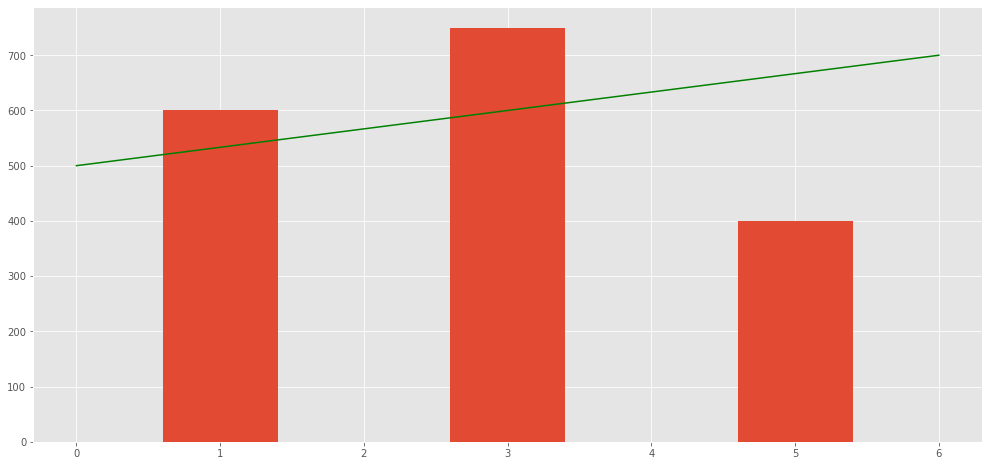

In [15]:
ax = plt.axes()

ax.plot([0, 6], [500, 700], color='g')
ax.bar([1, 3, 5], [600, 750, 400])

plt.show();

### несколько наборов осей на одной картинке

In [21]:
plt.subplots?

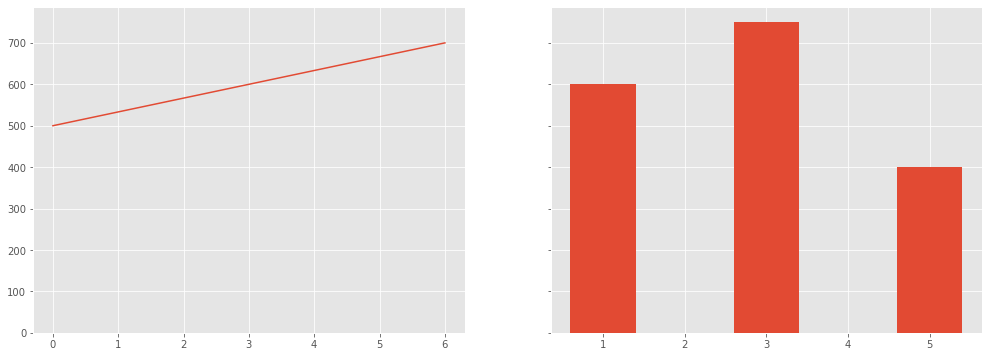

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6), sharey=True)

ax1.plot([0, 6], [500, 700])
ax2.bar([1, 3, 5], [600, 750, 400])

# ax1.set_ylim((0,725))

plt.show();

### несколько осей на один график

In [34]:
range(0, 10, 1)

range(0, 10)

In [33]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

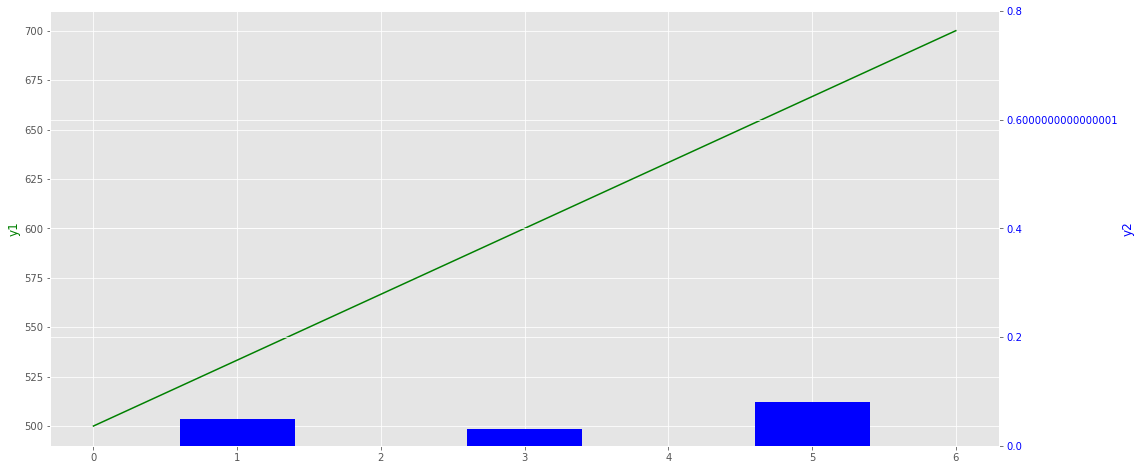

In [36]:
ax1 = plt.axes()

ax2 = ax1.twinx()

ax1.plot([0, 6], [500, 700], color='g')
ax1.set_ylabel('y1', color='g')

ax2.bar([1, 3, 5], [0.5, 0.3, 0.8], color='b')
ax2.set_ylabel('y2', color='b')
ax2.set_yticks(np.arange(0, 10, 2))
ax2.set_yticklabels(np.arange(0, 1, 0.2), color='b')

plt.show();

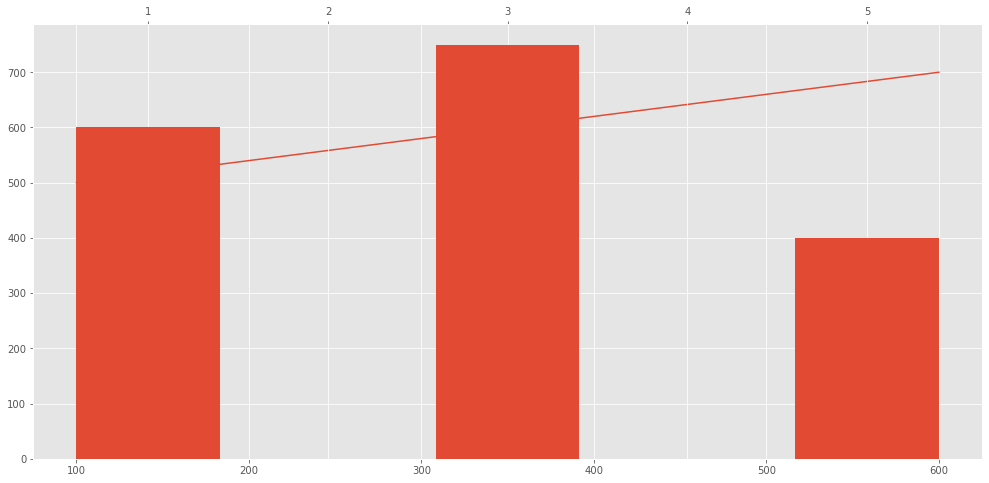

In [37]:
ax1 = plt.axes()

ax2 = ax1.twiny()

ax1.plot([100, 600], [500, 700])
ax2.bar([1, 3, 5], [600, 750, 400])

plt.show();